# Data Mining - Assignment 2

In [1]:
import pandas as pd
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from multiprocessing import cpu_count
from tqdm import trange
from math import isnan

In [2]:
cpu_count()

2

In [3]:
# FILE = '/home/walter/Desktop/DMT_data/training_set_VU_DM_2014.csv'
FILE = '../../ExpediaData/training_set_VU_DM_2014.csv'
FILE_TEST = '../../ExpediaData/test_set_VU_DM_2014.csv'

In [4]:
df = dd.read_csv(FILE)

In [59]:
df.to_csv('../../ExpediaData/train_split/train_data_*.csv')

['../../ExpediaData/train_split/train_data_00.csv',
 '../../ExpediaData/train_split/train_data_01.csv',
 '../../ExpediaData/train_split/train_data_02.csv',
 '../../ExpediaData/train_split/train_data_03.csv',
 '../../ExpediaData/train_split/train_data_04.csv',
 '../../ExpediaData/train_split/train_data_05.csv',
 '../../ExpediaData/train_split/train_data_06.csv',
 '../../ExpediaData/train_split/train_data_07.csv',
 '../../ExpediaData/train_split/train_data_08.csv',
 '../../ExpediaData/train_split/train_data_09.csv',
 '../../ExpediaData/train_split/train_data_10.csv',
 '../../ExpediaData/train_split/train_data_11.csv',
 '../../ExpediaData/train_split/train_data_12.csv',
 '../../ExpediaData/train_split/train_data_13.csv',
 '../../ExpediaData/train_split/train_data_14.csv',
 '../../ExpediaData/train_split/train_data_15.csv',
 '../../ExpediaData/train_split/train_data_16.csv',
 '../../ExpediaData/train_split/train_data_17.csv',
 '../../ExpediaData/train_split/train_data_18.csv',
 '../../Expe

In [22]:
df_test = dd.read_csv(FILE_TEST)

In [20]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [5]:
length = len(df)
print(length)

4958347


In [4]:
uni_search = df['srch_id'].unique().compute()
uni_v_loc = df['visitor_location_country_id'].unique().compute()
uni_site = df['site_id'].unique().compute()
uni_prop = df['prop_id'].unique().compute()
len(uni_search)
len(uni_prop)


129113

In [7]:
# List of all randomly ranked searches
df['srch_id'].where(df['random_bool']==1).unique().compute()

0             1.0
1             4.0
2             NaN
3            11.0
4            12.0
5            17.0
6            31.0
7            40.0
8            43.0
9            56.0
10           61.0
11           63.0
12           71.0
13           75.0
14           81.0
15           83.0
16           90.0
17           96.0
18          101.0
19          103.0
20          104.0
21          107.0
22          108.0
23          110.0
24          117.0
25          119.0
26          126.0
27          127.0
28          133.0
29          134.0
           ...   
60722    332661.0
60723    332666.0
60724    332667.0
60725    332668.0
60726    332682.0
60727    332685.0
60728    332686.0
60729    332689.0
60730    332690.0
60731    332691.0
60732    332693.0
60733    332701.0
60734    332706.0
60735    332707.0
60736    332710.0
60737    332713.0
60738    332715.0
60739    332717.0
60740    332718.0
60741    332729.0
60742    332730.0
60743    332732.0
60744    332742.0
60745    332747.0
60746    3

In [16]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [21]:
# count missing values
nulls = df.isnull().sum(axis=0).compute()

In [29]:
sparsity = nulls.sort_values()/length

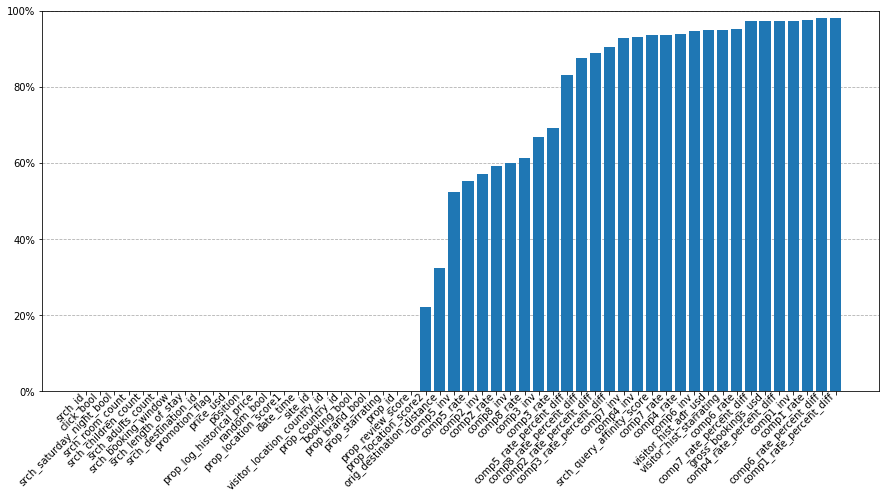

In [74]:
fig, ax = plt.subplots(figsize=[15, 7])
ax.bar(sparsity.index, sparsity.values)
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_xticklabels(sparsity.index, rotation=45, fontdict={'ha': 'right', 'va': 'baseline'})
ax.set_yticklabels(['{:.0%}'.format(i) for i in np.linspace(0, 1, 6)])
ax.set_ylim(0, 1)
plt.show()

In [25]:
# test set sparsity

nulls_test = df_test.isnull().sum(axis=0).compute()
len_test = len(df_test)
sparsity_test = nulls_test.sort_values()/len_test

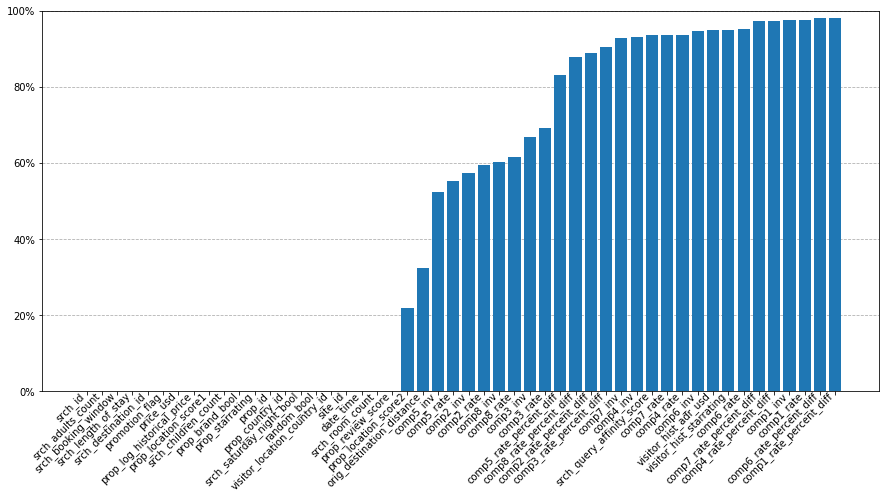

In [26]:
fig, ax = plt.subplots(figsize=[15, 7])
ax.bar(sparsity_test.index, sparsity_test.values)
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_xticklabels(sparsity_test.index, rotation=45, fontdict={'ha': 'right', 'va': 'baseline'})
ax.set_yticklabels(['{:.0%}'.format(i) for i in np.linspace(0, 1, 6)])
ax.set_ylim(0, 1)
plt.show()

In [88]:
# reduce competitor features
# take min of inv and rates?
# set nulls to 0s

comp_attributes = ['comp{}_rate'.format(i) for i in range(1, 9)] + ['comp{}_inv'.format(i) for i in range(1, 9)]
comp_percent_diffs = ['comp{}_rate_percent_diff'.format(i) for i in range(1, 9)]
# print(comp_attributes)
# take minimum value 
# df[comp_attributes]

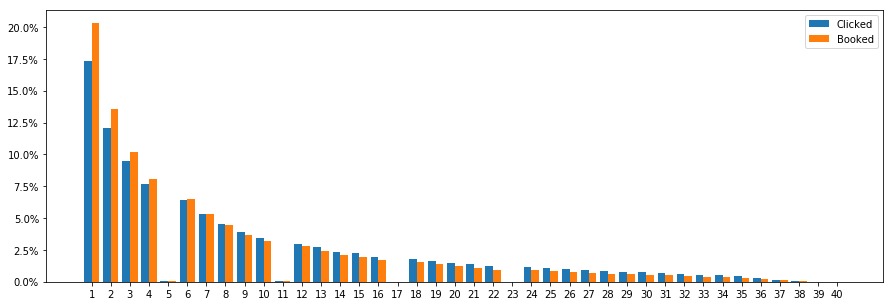

In [17]:
# plot hist of positions of clicked hotels 
pos_clicked = df['position'].where(df['click_bool']==1).compute()
pos_booked = df['position'].where(df['booking_bool']==1).compute()
pos_clicked = pos_clicked.value_counts(normalize=True)
pos_clicked.index = pos_clicked.index.map(int)
pos_booked = pos_booked.value_counts(normalize=True)
pos_booked.index = pos_booked.index.map(int)

fig, ax = plt.subplots(figsize=[15,5])
x = np.arange(1, 41)
ax.bar(x-0.2, pos_clicked[x], width=0.4, label='Clicked')
ax.bar(x+0.2, pos_booked[x], width=0.4, label='Booked')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()

/home/walter/.local/lib/python3.5/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


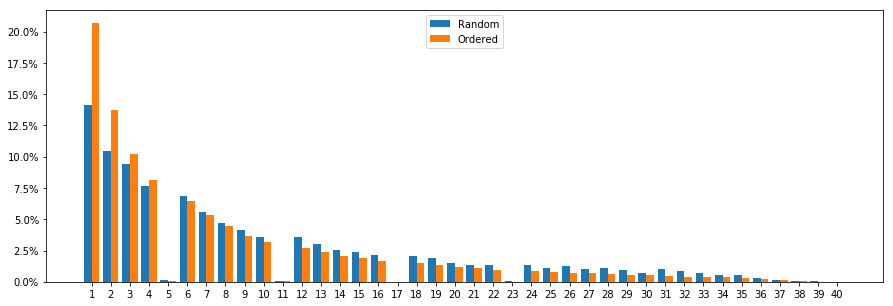

In [19]:
# plot hist of positions of booked hotels where ranking was random vs. ordered
pos_random = df['position'].where(df['booking_bool']==1).where(df['random_bool']==1).compute()
pos_ordered = df['position'].where(df['booking_bool']==1).where(df['random_bool']==0).compute()
pos_random = pos_random.value_counts(normalize=True)
pos_random.index = pos_random.index.map(int)
pos_ordered = pos_ordered.value_counts(normalize=True)
pos_ordered.index = pos_ordered.index.map(int)

fig, ax = plt.subplots(figsize=[15,5])
x = np.arange(1, 41)
ax.bar(x-0.2, pos_random[x], width=0.4, label='Random')
ax.bar(x+0.2, pos_ordered[x], width=0.4, label='Ordered')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()

In [6]:
clicked_properties = df['prop_id'].where(df['click_bool']==1).compute()
clicked_properties = clicked_properties.value_counts()
booking_properties = df['prop_id'].where(df['booking_bool']==1).compute()
booking_properties = booking_properties.value_counts()
# print(clicked_properties)
# print(booking_properties)

In [11]:
# h, bins = df.plot.histogram(clicked_properties, bins=100, range=[0, 250])

In [14]:
df['prop_location_score1'].describe().compute()

count    4.958347e+06
mean     2.872589e+00
std      1.531011e+00
min      0.000000e+00
25%      1.790000e+00
50%      2.830000e+00
75%      4.060000e+00
max      6.980000e+00
dtype: float64

In [15]:
df['prop_location_score2'].describe().compute()

count    3.867999e+06
mean     1.303852e-01
std      1.594634e-01
min      0.000000e+00
25%      1.960000e-02
50%      7.080000e-02
75%      1.846000e-01
max      1.000000e+00
dtype: float64

In [24]:
df.describe().compute().to_csv('./training_summaries')

### Fix split Srch_IDs

In [4]:
# some searches split over multiple files, fixes this
data1 = pd.read_csv('../../ExpediaData/train_split/train_data_00.csv', index_col=0)
for i in trange(19):
    data2 = pd.read_csv('../../ExpediaData/train_split/train_data_{:02d}.csv'.format(i+1), index_col=0)
    
    split_ID = data1['srch_id'].iloc[-1]
    
    if data2['srch_id'].iloc[0] != split_ID:
        print('{} and {} split perfectly :)'.format(i, i+1))
        data1.to_csv('../../ExpediaData/train_split_cleaned/train_data_{:02d}.csv'.format(i))
        data1 = data2
        continue
    
    # move split_ID for 2 to 1
    split_data_indexes = data2.loc[data2['srch_id'] == split_ID].index
    
    data1 = data1.append(data2.loc[split_data_indexes])
    data2 = data2.drop(split_data_indexes)
    
    # save data1
    data1.to_csv('../../ExpediaData/train_split_cleaned/train_data_{:02d}.csv'.format(i))
    
    data1 = data2
    
# finally save the last data2
data2.to_csv('../../ExpediaData/train_split_cleaned/train_data_{:02d}.csv'.format(19))

  5%|▌         | 1/19 [00:01<00:29,  1.62s/it]

0 and 1 split perfectly :)


 11%|█         | 2/19 [00:03<00:27,  1.60s/it]

1 and 2 split perfectly :)


 16%|█▌        | 3/19 [00:04<00:25,  1.61s/it]

2 and 3 split perfectly :)


 21%|██        | 4/19 [00:06<00:25,  1.68s/it]

3 and 4 split perfectly :)


 26%|██▋       | 5/19 [00:08<00:23,  1.69s/it]

4 and 5 split perfectly :)


 32%|███▏      | 6/19 [00:10<00:22,  1.70s/it]

5 and 6 split perfectly :)


 37%|███▋      | 7/19 [00:12<00:20,  1.73s/it]

6 and 7 split perfectly :)


 42%|████▏     | 8/19 [00:14<00:19,  1.76s/it]

7 and 8 split perfectly :)


 47%|████▋     | 9/19 [00:15<00:17,  1.74s/it]

8 and 9 split perfectly :)


 53%|█████▎    | 10/19 [00:17<00:15,  1.75s/it]

9 and 10 split perfectly :)


 58%|█████▊    | 11/19 [00:19<00:13,  1.75s/it]

10 and 11 split perfectly :)


 63%|██████▎   | 12/19 [00:20<00:12,  1.73s/it]

11 and 12 split perfectly :)


 68%|██████▊   | 13/19 [00:22<00:10,  1.76s/it]

12 and 13 split perfectly :)


 74%|███████▎  | 14/19 [00:25<00:08,  1.80s/it]

13 and 14 split perfectly :)


 79%|███████▉  | 15/19 [00:27<00:07,  1.80s/it]

14 and 15 split perfectly :)


 84%|████████▍ | 16/19 [00:28<00:05,  1.80s/it]

15 and 16 split perfectly :)


 89%|████████▉ | 17/19 [00:30<00:03,  1.80s/it]

16 and 17 split perfectly :)


 95%|█████████▍| 18/19 [00:32<00:01,  1.81s/it]

17 and 18 split perfectly :)


100%|██████████| 19/19 [00:34<00:00,  1.80s/it]

18 and 19 split perfectly :)


### Data Clean-Up

In [138]:
comp_attributes = ['comp{}_rate'.format(i) for i in range(1, 9)] + ['comp{}_inv'.format(i) for i in range(1, 9)]
comp_percent_diffs = ['comp{}_rate_percent_diff'.format(i) for i in range(1, 9)]

# iterate over the split data sets
for i in trange(0, 20):
    # load data set
    data = pd.read_csv('../../ExpediaData/train_split_cleaned/train_data_{:02d}.csv'.format(i))
    data.drop(columns=['Unnamed: 0'], inplace=True)
    
    # Summarise competitor attributes and drop them
    data['competitors'] = np.nanmin(data[comp_attributes], axis=1)
    data['competitors'] = data['competitors'].fillna(0)
    data.drop(comp_attributes+comp_percent_diffs, axis=1, inplace=True)
    
    # Adjust affinity score attribute
    data['srch_query_affinity_score'] = np.exp(data['srch_query_affinity_score']).fillna(0)
    
    # Add column 'prop_reviewed'
    data['prop_reviewed'] = True
    data['prop_reviewed'].loc[(data['prop_review_score'] == 0)] = False
    data['prop_reviewed'].loc[(data['prop_review_score'].isnull())] = False
    
    # now to iterate over every search ID and fill in more missing data
    s_ids = data['srch_id'].unique()
    
    for s_id in s_ids:
        # get block of each search
        search = data.loc[data['srch_id'] == s_id]
        s_idx = search.index
        
        # clean up prop_location_score2
        avg_pls2 = search['prop_location_score2'].mean()
        
        if isnan(avg_pls2):
            avg_pls2 = 0.5
        
        data.loc[s_idx, 'prop_location_score2'] = data.loc[s_idx, 'prop_location_score2'].fillna(avg_pls2)
        
        
    # finally, drop unused columns
    data.drop(columns=['gross_bookings_usd'], inplace=True)
        
    # save cleaned csv
    data.to_csv('../../ExpediaData/train_split_cleaned2/train_data_{:02d}.csv'.format(i))



  0%|          | 0/20 [00:00<?, ?it/s]/home/arran/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: All-NaN axis encountered
  # This is added back by InteractiveShellApp.init_path()
/home/arran/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)

100%|██████████| 20/20 [20:36<00:00, 61.80s/it]


In [33]:
# clean up orig_destination_distance attribute

for i in range(0, 1):
    # load data set
    data = pd.read_csv('../../ExpediaData/train_split_cleaned2/train_data_{:02d}.csv'.format(i))
    data.drop(columns=['Unnamed: 0'], inplace=True)
    
    data['avg_orig_dest_dist'] = 0
    data['std_orig_dest_dist'] = 0
    

    s_ids = data['srch_id'].unique()
    for j, s_id in enumerate(s_ids):
        print('Search ID {}  |  {}/{}'.format(s_id, j, len(s_ids)))
        # get block of each search
        search = data.loc[data['srch_id'] == s_id]
        s_idx = search.index

        # fill in missing values for orig_destination_distance
        num_nulls = search['orig_destination_distance'].isnull().values.sum()
        if num_nulls == len(search):
            # look for similar trips
            origin = search['visitor_location_country_id'].iloc[0]
            dest_id = search['srch_destination_id'].iloc[0]
            prop_country = search['prop_country_id'].iloc[0]
            
            same_trip = df.loc[ (df['visitor_location_country_id'] == origin) & 
                    ((df['srch_destination_id'] == dest_id) | (df['prop_country_id'])) == prop_country].compute()
            
            avg_odd = same_trip['orig_destination_distance'].mean()
            
            # can still be nan, just use average distance to this booking...
            if isnan(avg_odd):
                same_trip = df.loc[df['srch_destination_id'] == dest_id].compute()
                avg_odd = same_trip['orig_destination_distance'].mean()
                std_odd = same_trip['orig_destination_distance'].std()
            else:
                std_odd = same_trip['orig_destination_distance'].std()

        
        else:
            avg_odd = search['orig_destination_distance'].mean()
            std_odd = search['orig_destination_distance'].std()
            
        data.loc[s_idx, 'avg_orig_dest_dist'] = avg_odd
        data.loc[s_idx, 'std_orig_dest_dist'] = std_odd
    

    data.drop(columns=['orig_destination_distance'], inplace=True)
    
    # save cleaned csv
    data.to_csv('../../ExpediaData/train_split_cleaned3/train_data_{:02d}.csv'.format(i))


Search ID 1  |  0/10104
Search ID 4  |  1/10104
Search ID 6  |  2/10104
Search ID 8  |  3/10104
Search ID 11  |  4/10104
Search ID 12  |  5/10104
Search ID 17  |  6/10104
Search ID 21  |  7/10104
Search ID 25  |  8/10104
Search ID 28  |  9/10104
Search ID 29  |  10/10104
Search ID 30  |  11/10104
Search ID 31  |  12/10104
Search ID 36  |  13/10104
Search ID 39  |  14/10104
Search ID 40  |  15/10104
Search ID 42  |  16/10104
Search ID 43  |  17/10104
Search ID 44  |  18/10104
Search ID 45  |  19/10104
Search ID 46  |  20/10104
Search ID 47  |  21/10104
Search ID 49  |  22/10104
Search ID 52  |  23/10104
Search ID 53  |  24/10104
Search ID 56  |  25/10104
Search ID 57  |  26/10104
Search ID 60  |  27/10104
Search ID 61  |  28/10104
Search ID 63  |  29/10104
Search ID 64  |  30/10104
Search ID 65  |  31/10104
Search ID 66  |  32/10104
Search ID 67  |  33/10104
Search ID 71  |  34/10104
Search ID 72  |  35/10104
Search ID 73  |  36/10104
Search ID 74  |  37/10104
Search ID 75  |  38/10104


KeyboardInterrupt: 

In [24]:
data = pd.read_csv('../../ExpediaData/train_split_cleaned2/train_data_00.csv')

In [25]:
search = data.loc[data['srch_id'] == 21]

In [28]:
search['visitor_location_country_id'].iloc[0]

55

In [30]:
search['prop_country_id'].iloc[0]

216

In [31]:
search['srch_destination_id'].iloc[0]

18161

In [20]:
same_trip = df.loc[ (df['visitor_location_country_id'] == 187) & 
                    ((df['srch_destination_id'] == 23246) | (df['prop_country_id'])) == 219].compute()

In [18]:
same_trip = df.loc[df['srch_destination_id'] == 23246].compute()

In [21]:
same_trip['orig_destination_distance'].mean()

nan

In [34]:
test_set = dd.read_csv('../../ExpediaData/test_set_VU_DM_2014.csv')

In [36]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
